In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Problem 1

A. I chose the average number of cosmic background rays to be 2.8 rays/day. My candidate's average number of gamma rays is 7.1

In [3]:
day_avg = 3.8
rays_emitted = 7.1

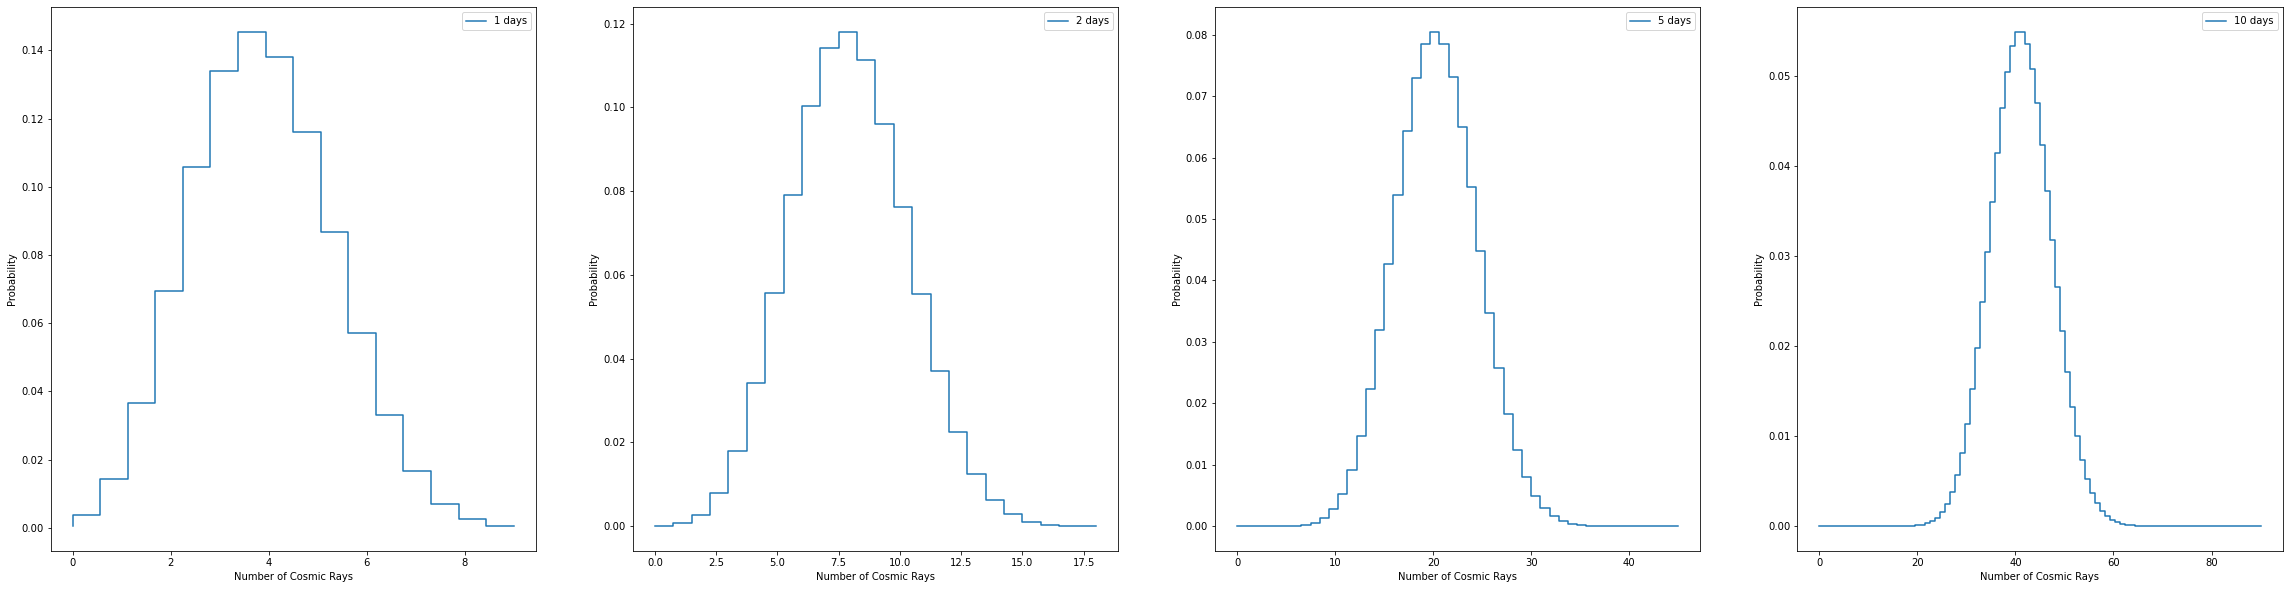

In [4]:
all_pdf = []
all_x = []

x = np.arange(stats.poisson.ppf(0.01,day_avg), stats.poisson.ppf(0.99,day_avg))
poisson_pdf = stats.poisson.pmf(x, day_avg)

#sum over 1, 2, and 5 days
n = [1, 2, 5,10]
for i in n:
    conv_i = poisson_pdf
    for j in range(i):
        conv_i = np.convolve(poisson_pdf, conv_i)
    x_i = np.linspace(i*stats.poisson.ppf(0.01,day_avg), i*stats.poisson.ppf(0.99,day_avg), num = len(conv_i))
    all_pdf.append(conv_i)
    all_x.append(x_i)

fig, ax = plt.subplots(1, len(n), figsize = (len(n)*10,10))
for i in range(len(n)):
    ax[i].step(all_x[i], all_pdf[i], label = str(n[i])+' days')
    ax[i].set_xlabel('Number of Cosmic Rays')
    ax[i].set_ylabel('Probability')
    ax[i].legend()
plt.show()

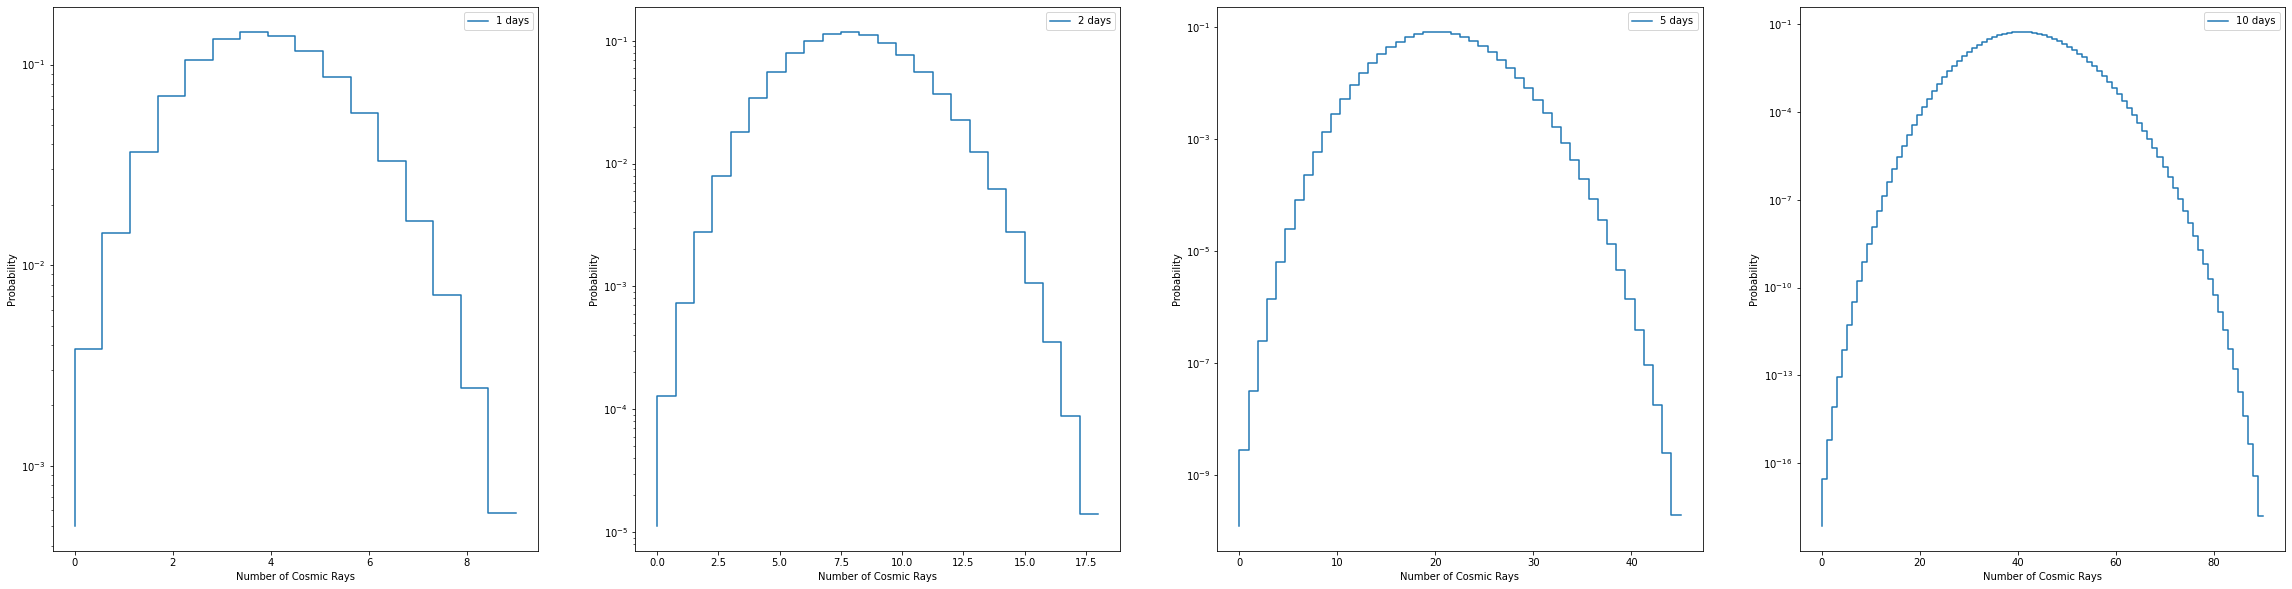

In [5]:
fig, ax = plt.subplots(1, len(n), figsize = (len(n)*10,10))
for i in range(len(n)):
    ax[i].step(all_x[i], all_pdf[i], label = str(n[i])+' days')
    ax[i].set_xlabel('Number of Cosmic Rays')
    ax[i].set_ylabel('Probability')
    ax[i].semilogy()
    ax[i].legend()
plt.show()

B. After 5 days, the distribution is still Poisson because the distribution can still be described as the probability of an event in a time interval. So the mean number of a gamma-rays detected is still 3.8/day but scaled up for 5 days. 
The probability mass function of a Poisson distribution is
$$P_\lambda(n) = \frac{\lambda^n e^{-\lambda}}{n!}$$
Next use the convolution formula where $x$ and $y$ are Poisson random variables that have $\lambda_1$ and $\lambda_2$ as parameters. Let $\lambda = \lambda_1 + \lambda_2$ and $z = x+y$.
$$P(z) = P(x) * P(y)\\
= \sum^{z}_{n=0} P(n)P(z-n)\\
= \sum^{z}_{n=0}\frac{\lambda_1^n e^{-\lambda_1}}{n!}\frac{\lambda_2^{z-n} e^{-\lambda_2}}{(z-n)!}\\
= \sum^{z}_{n=0}\frac{1}{n!(z-n)!}e^{-\lambda_1}\lambda_1^n e^{-\lambda_2}\lambda_2^{z-n}\\
= \sum^{z}_{n=0}\frac{z!}{n!(z-n)!}\frac{e^{-\lambda_1}\lambda_1^n e^{-\lambda_2}\lambda_2^{z-n}}{z!}\\
= \sum^{z}_{n=0}\binom{z}{n}\frac{e^{-\lambda_1}\lambda_1^n e^{-\lambda_2}\lambda_2^{z-n}}{z!}\\
=\frac{e^{-\lambda}}{z!} \sum^{z}_{n=0}\binom{z}{n}\lambda_1^n \lambda_2^{z-n}\\
=\frac{e^{-\lambda}}{z!}(\lambda_1 + \lambda_2)^z\\
= \frac{e^{-\lambda}\lambda^z}{z!}
$$

C. The central limit theorem says that most distributions, when summed or averaged over enough trials, will converge to a Gaussian. This can be seen in the log y-axis graphs where the shape of the probability distribution is an upside down parabola like a Gaussian. Although a Poisson distribution summed with another Poisson distribution is also Poisson, it is like a Gaussian distribution because for large number of trials, the shape of the graph is symmetrically decreasing away from the mean value and a Poisson distribution can be approximated with a Gaussian distribution. 

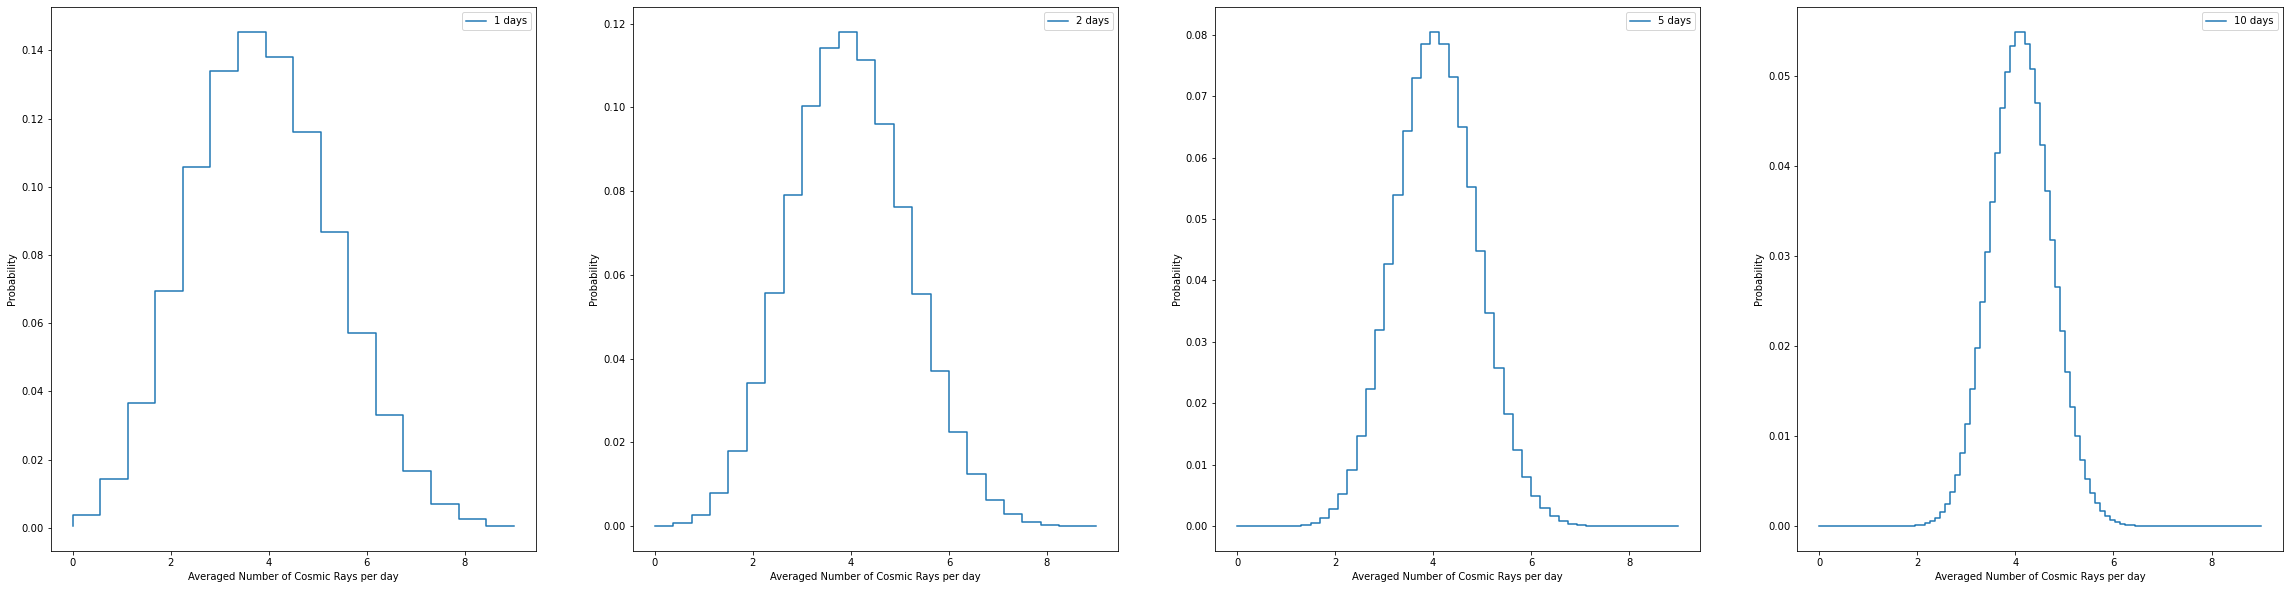

In [6]:
fig, ax = plt.subplots(1, len(n), figsize = (len(n)*10,10))
for i in range(len(n)):
    ax[i].step(all_x[i]/n[i], all_pdf[i], label = str(n[i])+' days')
    ax[i].set_xlabel('Averaged Number of Cosmic Rays per day')
    ax[i].set_ylabel('Probability')
    ax[i].legend()
plt.show()

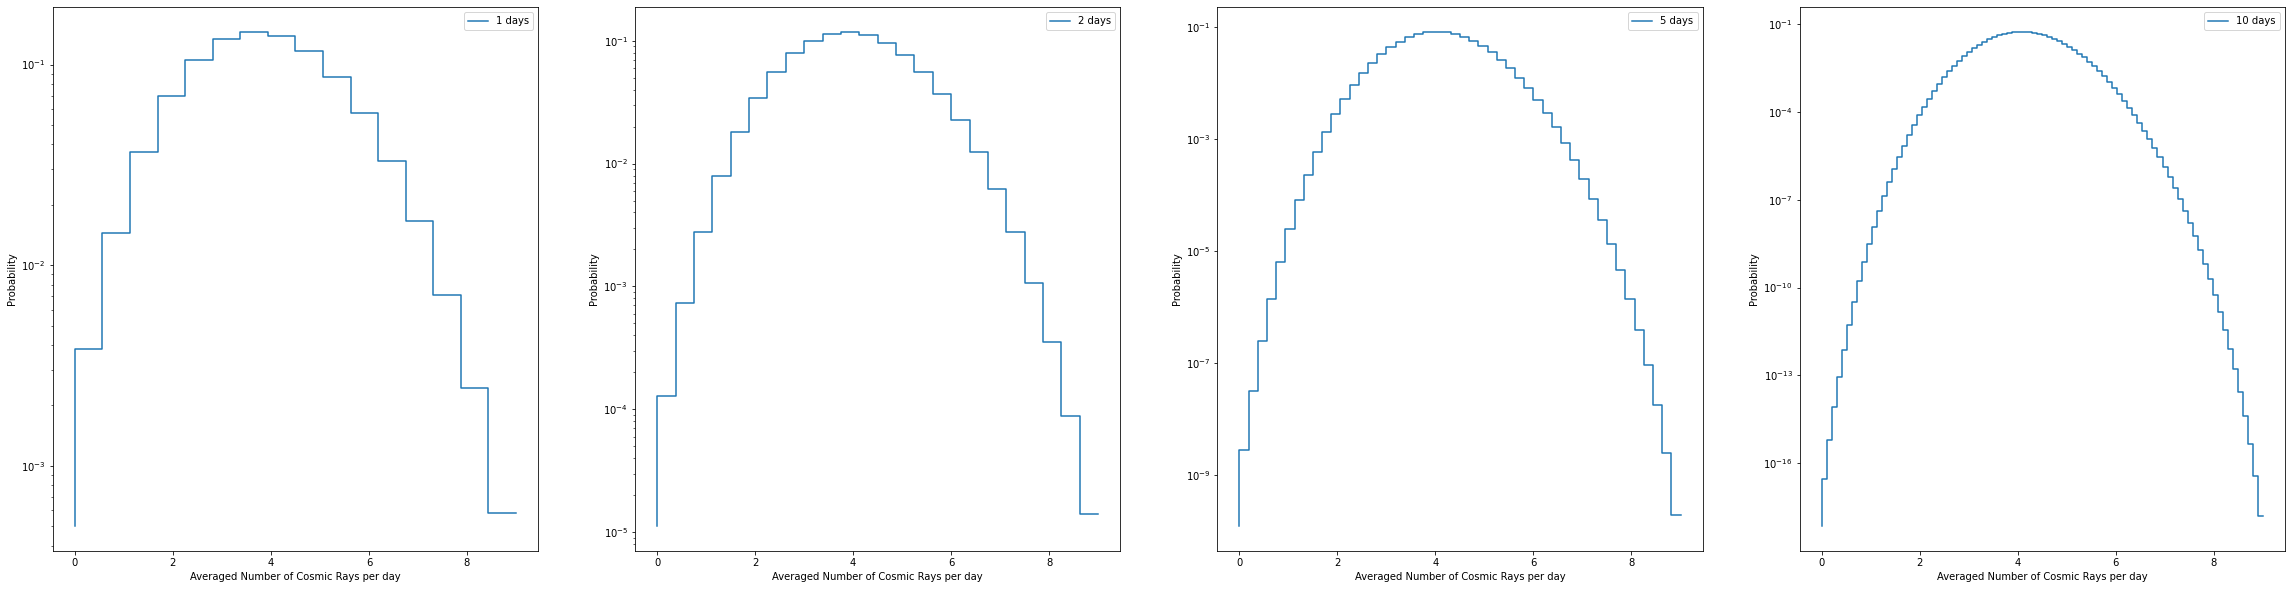

In [7]:
fig, ax = plt.subplots(1, len(n), figsize = (len(n)*10,10))
for i in range(len(n)):
    ax[i].step(all_x[i]/n[i], all_pdf[i], label = str(n[i])+' days')
    ax[i].set_xlabel('Averaged Number of Cosmic Rays per day')
    ax[i].set_ylabel('Probability')
    ax[i].semilogy()
    ax[i].legend()
plt.show()

D. Let N be 10 days

In [8]:
n = 10
total_rays = rays_emitted * n
#print(total_rays)
conv_i = poisson_pdf
for i in range(n):
    conv_i = np.convolve(poisson_pdf, conv_i)
x_i = np.linspace(n*stats.poisson.ppf(0.01,day_avg), n*stats.poisson.ppf(0.99,day_avg), num = len(conv_i))
mean = sum(x_i*conv_i)
#print(mean)
probability = stats.poisson.sf(total_rays, mean)
#print(probability)
sigma = stats.norm.ppf(probability)
print(str(round(sigma,2)))

-5.44


# Problem 2
I chose to do the $\chi^2$ distribution with 4 degrees of freedom. As I increase the number of convolutions, the shape of the plot in a log y-axis gradually becomes less skewed. The peak of the probability moves toward the center of the x-values. It does start to approach a Gaussian but very slowly and I wasn't able to continue doing convolutions without getting an overflow error. 

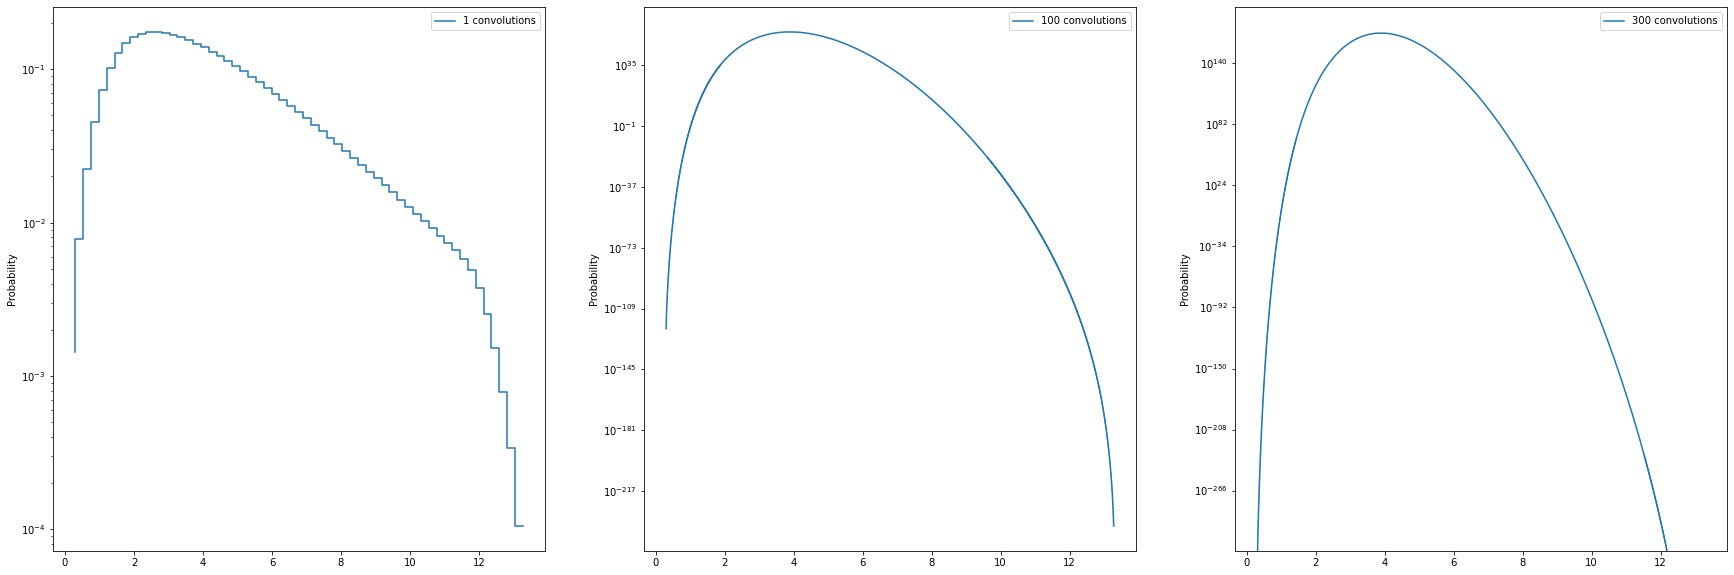

In [9]:
df = 4 
x = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df))
chi2_pdf = stats.chi2.pdf(x, df)

all_pdf = []
all_x = []

n = [1,100,300]
for i in n:
    conv_i = poisson_pdf
    for j in range(i):
        conv_i = np.convolve(chi2_pdf, conv_i)
    x_i = np.linspace(i*stats.chi2.ppf(0.01,df), i*stats.chi2.ppf(0.99,df), num = len(conv_i))
    all_pdf.append(conv_i)
    all_x.append(x_i)

fig, ax = plt.subplots(1, len(n), figsize = (len(n)*10,10))
for i in range(len(n)):
    ax[i].step(all_x[i]/n[i], all_pdf[i], label = str(n[i])+' convolutions')
    ax[i].set_ylabel('Probability')
    ax[i].semilogy()
    ax[i].legend()
plt.show()

# Problem 3
## Version 1
Background Gaussian width = 3

Signal Strength = 12.1

In [10]:
width = 3

probability = stats.norm.cdf(12.1, scale = width)
sigma = stats.norm.ppf(probability)

print(sigma)

4.033333333333666


No, it is not enough for a discovery because it is only 4$\sigma$.

## Version 2

If there is no signal in 1 px, what is the probability density function? For 10k px, it is the same as saying there are 10k trials of 1 px.

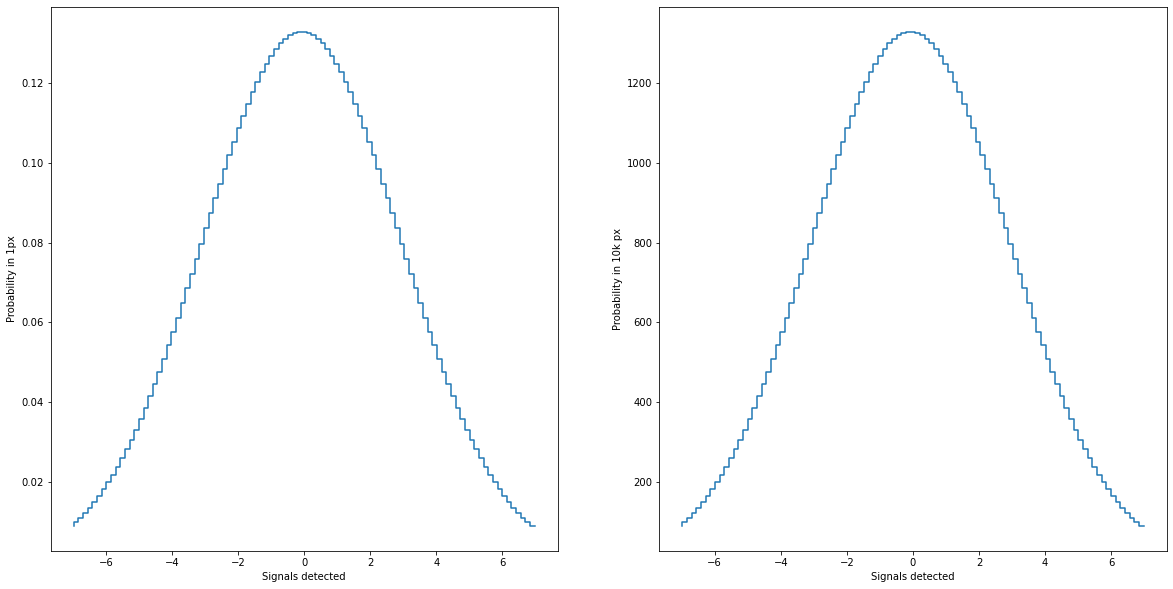

In [57]:
px = 10000

x = np.linspace(stats.norm.ppf(0.01,scale=width), stats.norm.ppf(0.99, scale=width),100)
gauss_pdf = stats.norm.pdf(x, scale=width)

total_pdf = gauss_pdf*px

fig, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].step(x, gauss_pdf)
ax[1].step(x, total_pdf)

ax[0].set_ylabel('Probability in 1px')
ax[1].set_ylabel('Probability in 10k px')

ax[0].set_xlabel('Signals detected')
ax[1].set_xlabel('Signals detected')
plt.show()

In [69]:
probability = stats.norm.cdf(12.1, scale = width)
sigma = stats.norm.ppf(probability/px)

print(sigma)

-3.7190234315438726


The probability of a signal of 12.1 is 3.7$\sigma$

# Problem 4

In [83]:
prob5Sigma = 1/3.5e6
px= 1e4
#what is the x value for a 5sigma detection?
signal_1 = stats.norm.ppf(1-prob5Sigma, scale = width)
signal_2 = stats.norm.ppf(1-prob5Sigma/px, scale = width)
print(prob5Sigma/px)

ratio = signal_2/signal_1
print(ratio)

2.857142857142857e-11
15.001894304791143 19.65307918215476
1.3100398378275582


The signal needs to be 31% brighter for 10k pixels compared to the signal for 1px. I think that the difference is low because the probability densities are still the same scale (width). Since 5$\sigma$ is 1/3.5e6, dividing that by another 1e4 changes the magnitude to around 3e-11. 

In [81]:
px = [1e1, 1e2, 1e4 ,1e6, 1e8]

x = np.linspace(stats.norm.ppf(0.01,scale=width), stats.norm.ppf(0.99, scale=width),100)
gauss_pdf = stats.norm.pdf(x, scale=width)

total_pdf = []
for i in px:
    total_pdf.append(gauss_pdf*i)

print('Signal required for 5 sigma:')    
signal = []
for i in range(len(px)):
    signal.append(stats.norm.ppf(1-prob5Sigma/px[i], scale = width))
    print(signal[i])
    
print('Ratio of 1e1, 1e2, 1e4, 1e6, 1e8 px signals to 1px signal')
for i in range(len(px)):
    ratio = signal[i]/signal_1
    print(ratio)

Signal required for 5 sigma:
16.28255632934895
17.47473463607721
19.65307918215476
21.621471302964856
23.426422490754568
Ratio of 1e1, 1e2, 1e4, 1e6, 1e8 px signals to 1px signal
1.085366687602165
1.1648352055444302
1.3100398378275582
1.441249409153591
1.5615642941353673


Each order of magnitude increase in pixels increases the signal brightness needed by around 8%.